# Developing Pre-Processing

In [1]:
%matplotlib notebook

In [15]:
# imports
from importlib import reload
import os

import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo.preproc import utils as pp_utils
from ulmo import plotting

# Load an Example scan

In [3]:
d_path = '/home/xavier/Projects/Oceanography/AI/ODD/'

In [4]:
filename = os.path.join(d_path, 'A2010059070500.L2_LAC_SST.nc')

In [5]:
sst, qual, latitude, longitude = ulmo_io.load_nc(filename, verbose=False)

# Mask

In [6]:
masks = pp_utils.build_mask(sst, qual)

In [7]:
masks

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

# Grab a field

In [8]:
field_size=(128, 128)

In [9]:
row, col = 1209, 377 # From our examples

In [13]:
field = sst[row:row+field_size[0], col:col+field_size[1]]
mask = masks[row:row+field_size[0], col:col+field_size[1]]

In [20]:
# Cloud coverage
np.sum(mask)/field.size

0.03790283203125

## Show

<IPython.core.display.Javascript object>


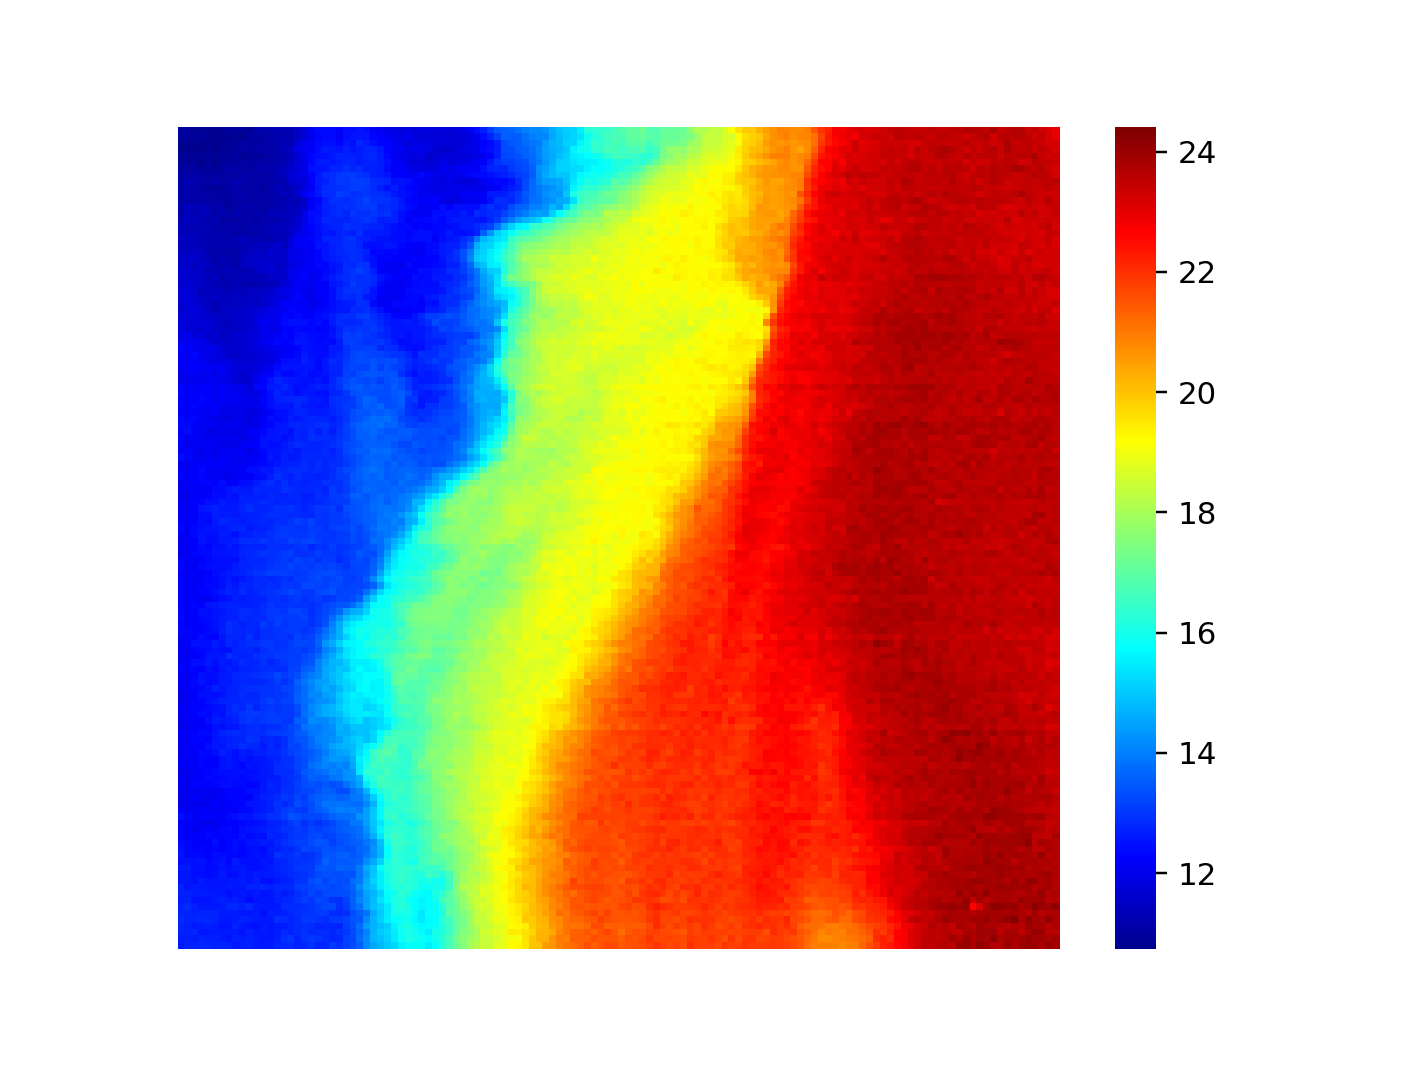

In [12]:
pal, cm = plotting.load_palette()
plt.clf()
ax = plt.gca()
sns.heatmap(field, ax=ax, xticklabels=[], yticklabels=[], cmap=cm)#, vmin=-2, vmax=2)
plt.show()

# Pre-process

In [21]:
pp_field, mu = pp_utils.preproc_field(field, mask)

In [22]:
mu

18.702414

## Show

<IPython.core.display.Javascript object>


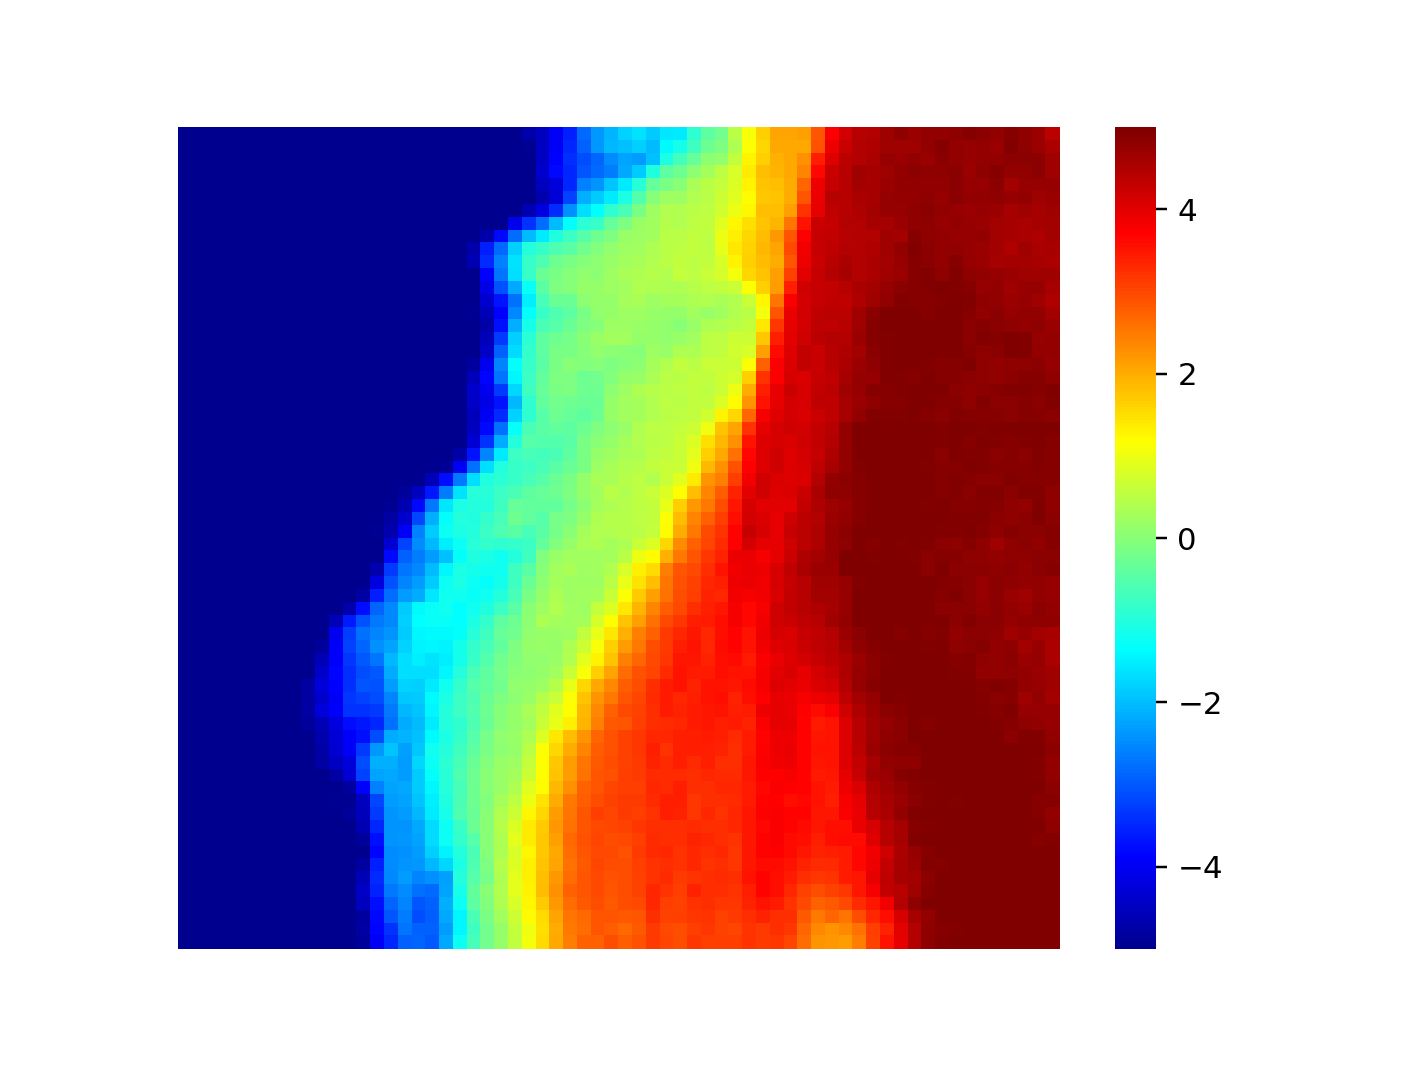

In [24]:
#pal, cm = plotting.load_palette()
plt.clf()
ax = plt.gca()
sns.heatmap(pp_field, ax=ax, xticklabels=[], yticklabels=[], cmap=cm, vmin=-5, vmax=5)
plt.show()